In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

**Task 1: Exploratory Data Analysis (EDA):**

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# null values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
# duplicates
df.duplicated().sum()

np.int64(0)

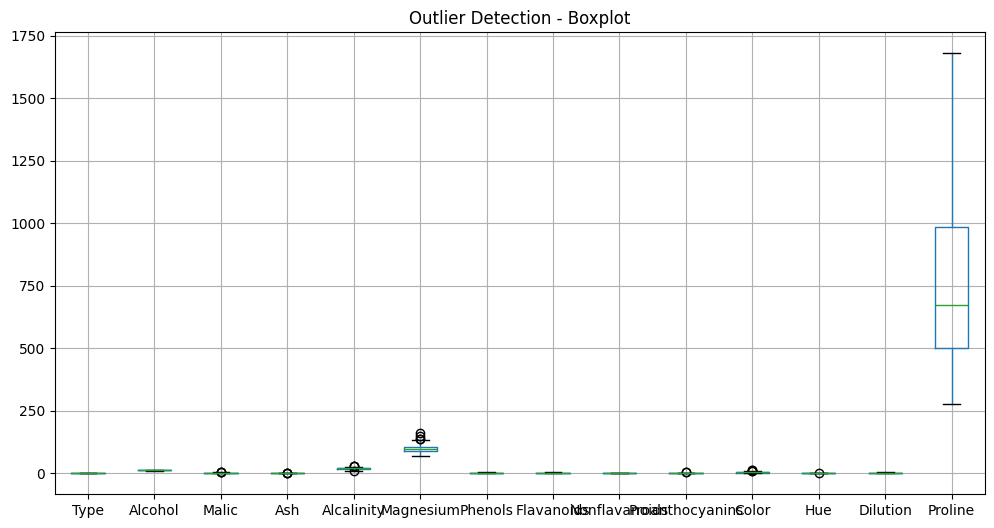

In [9]:
# Outliers
df.boxplot(figsize=(12,6))
plt.title("Outlier Detection - Boxplot")
plt.show()

In [10]:
# Outlier Capping Function
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower if x < lower else upper if x > upper else x)

for col in df.select_dtypes(['int', 'float']).columns:
    outlier_capping(df, col)

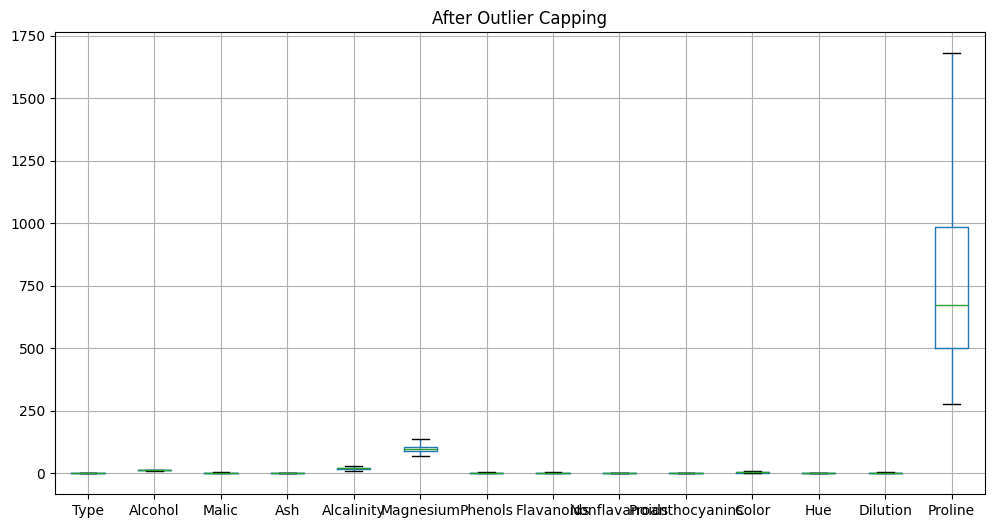

In [11]:
df.boxplot(figsize=(12,6))
plt.title("After Outlier Capping")
plt.show()

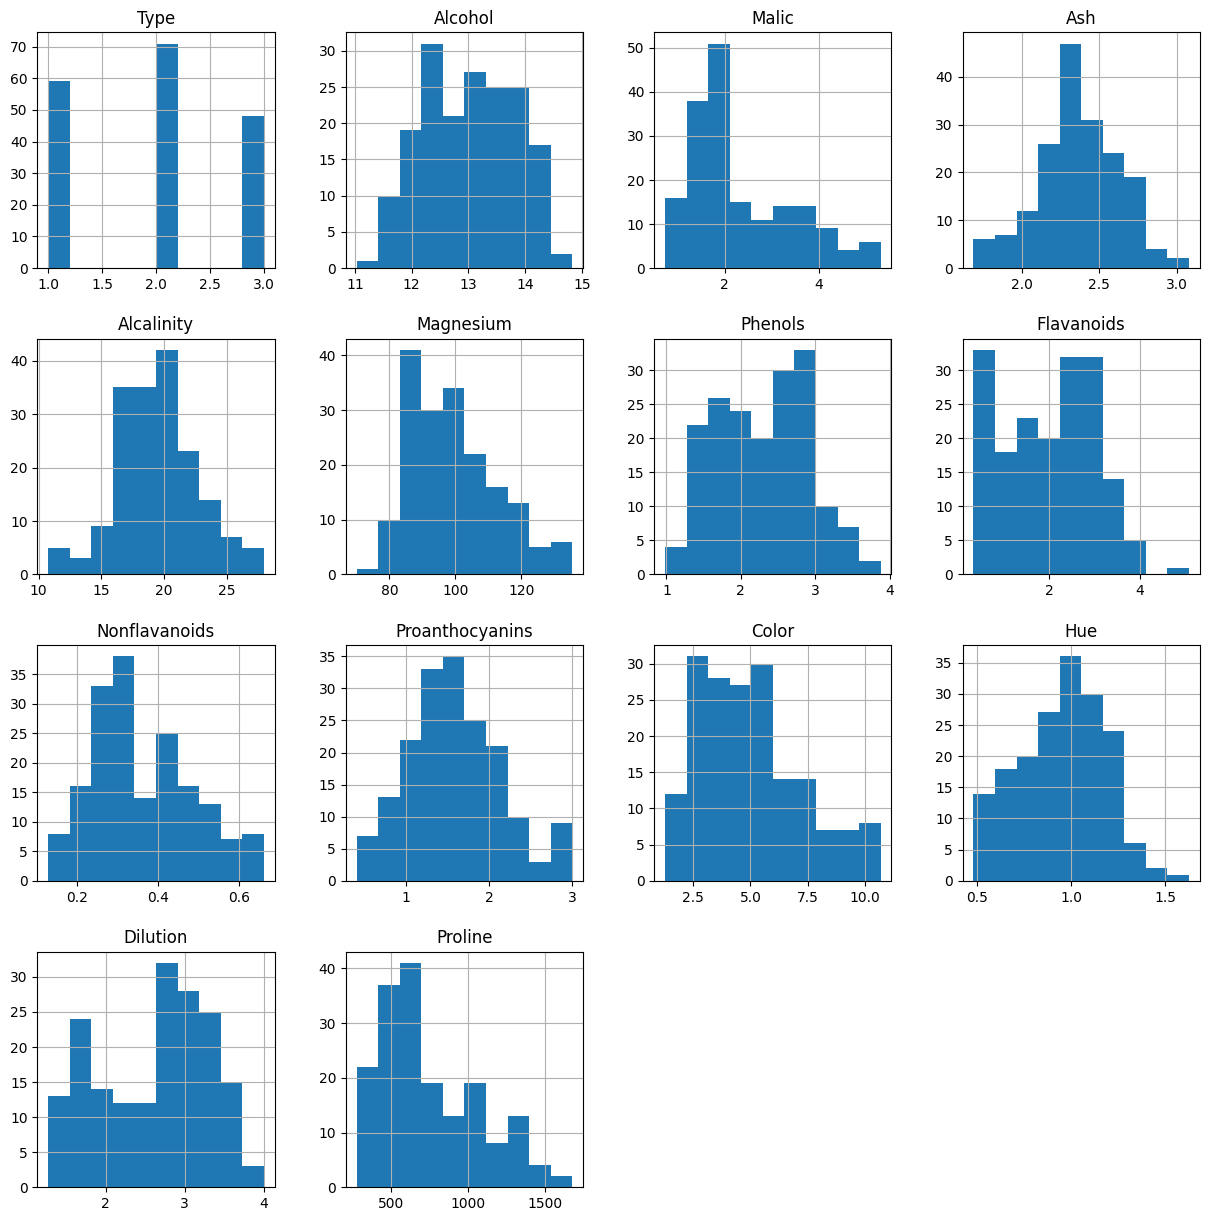

In [12]:
# Histogram
df.hist(figsize=(15,15))
plt.show()

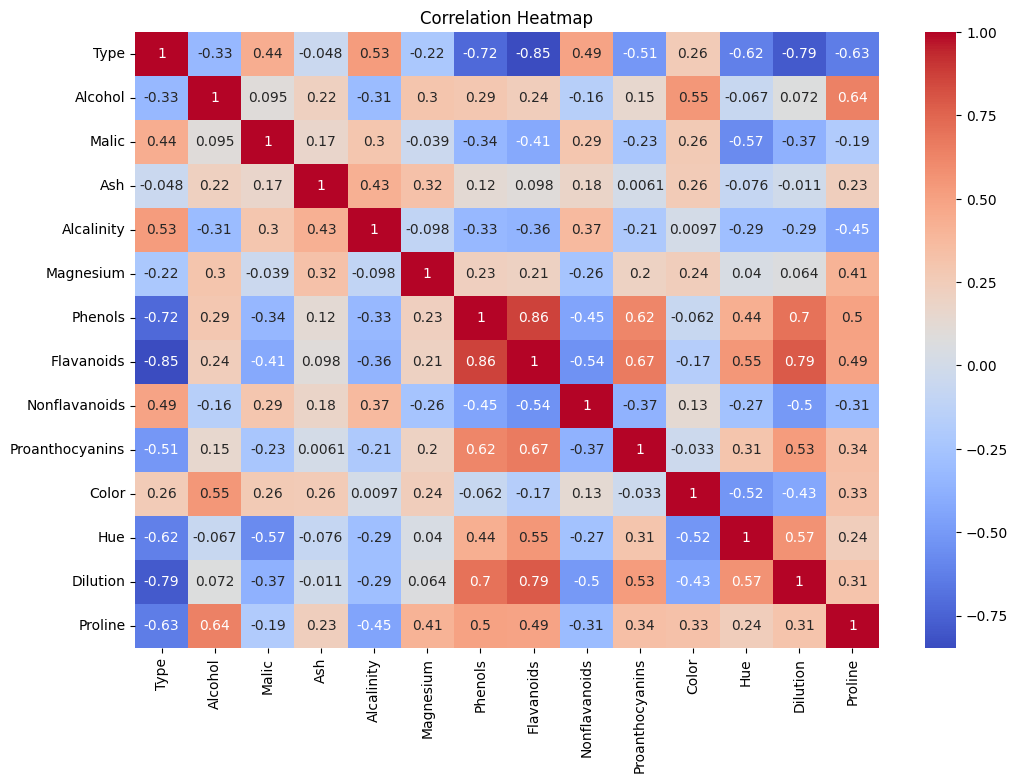

In [13]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Dimensionality Reduction with PCA:**

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [14]:
target = df[['Type']]
features = df.drop(columns=['Type'])

In [15]:
features.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [16]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

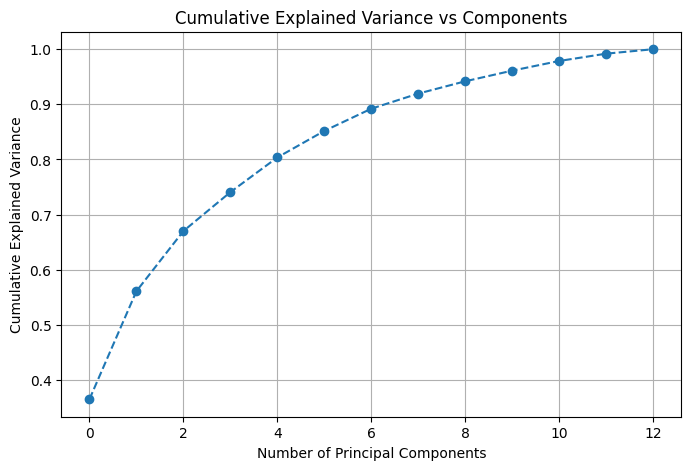

In [17]:
# PCA Variance Plot
pca_test = PCA()
pca_test.fit(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Components')
plt.grid(True)
plt.show()

In [18]:
# Select 10 PCs
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

3.	Transform the original dataset into the principal components.

**Clustering with Original Data:**

In [21]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)

In [22]:
df["Cluster_Original"] = labels_original

In [23]:
# Evaluation Metrics
sil_original = silhouette_score(X_scaled, labels_original)
db_original = davies_bouldin_score(X_scaled, labels_original)

In [24]:
print("Silhouette Score (Original Data):", sil_original)
print("Davies–Bouldin Index (Original Data):", db_original)

Silhouette Score (Original Data): 0.2854626783251893
Davies–Bouldin Index (Original Data): 1.3816062413276704


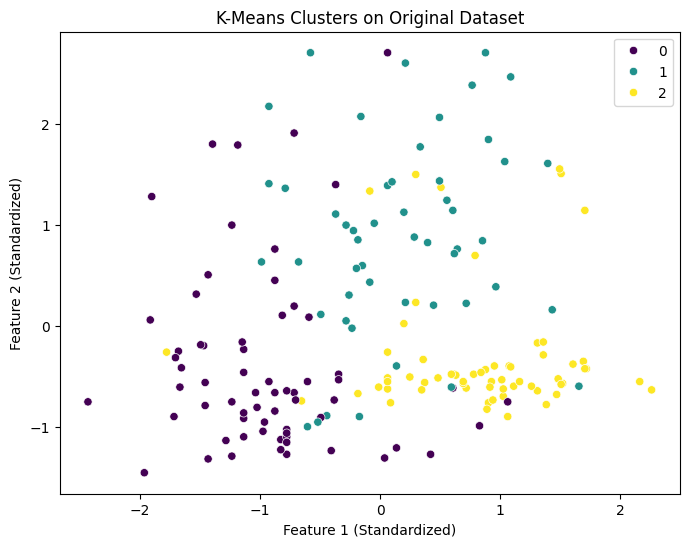

In [25]:
# Visualization (First two original features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_original, palette='viridis')
plt.title("K-Means Clusters on Original Dataset")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

**Task 4: Clustering with PCA Data:**

In [26]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

In [27]:
df["Cluster_PCA"] = labels_pca

In [28]:
# Metrics
sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)

In [29]:
print("Silhouette Score (PCA Data):", sil_pca)
print("Davies–Bouldin Index (PCA Data):", db_pca)

Silhouette Score (PCA Data): 0.299240684480823
Davies–Bouldin Index (PCA Data): 1.3289175401056141


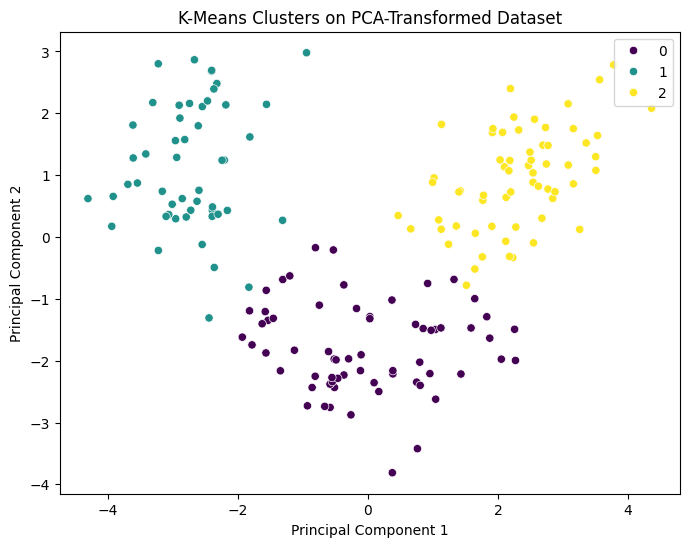

In [30]:
# Visualization using PC1 & PC2
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette='viridis')
plt.title("K-Means Clusters on PCA-Transformed Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Task 5: Comparison and Analysis:

1. Compare the clustering results obtained from the original dataset and PCA-transformed data.  
   - The original dataset produced clusters with more overlap due to high dimensionality.
   - PCA-transformed data resulted in more compact and visually separable clusters.
   - Silhouette Score (Original Data): **0.2855**
   - Silhouette Score (PCA Data): **0.2992**
   - Davies–Bouldin Index (Original Data): **1.3816**
   - Davies–Bouldin Index (PCA Data): **1.3289**

2. Discuss any similarities or differences observed in the clustering results.  
   - Both approaches identified three natural clusters in the wine dataset.
   - PCA-based clustering generated slightly more cohesive and better-separated clusters.
   - Original data clusters show more noise and overlap between classes.
   - PCA reduces correlated features, enhancing cluster structure.

3. Reflect on the impact of dimensionality reduction on clustering performance.  
   - PCA improved clustering performance by removing redundant and noisy information.
   - Dimensionality reduction helped create tighter clusters with better boundaries.
   - PCA also reduced computational complexity and improved visualization.

4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.  
   - PCA improves performance and clarity but reduces interpretability of component features.
   - Original feature clustering is more interpretable but less effective due to noise and correlation.
   - PCA + K-Means is ideal for performance, visualization, and noise reduction.
   - Original data clustering is preferred when understanding which features drive clusters is important.
